In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# system params
delta_t = 0.01
time = 1
v_0 = np.array([[1, -1, 4]])
a = np.array([[0, 0, -9.8]])
n = int(time/delta_t)

# get noisy data
t = np.linspace(0, 1, n)
t_batch = np.repeat(np.array([t]).T, 3, 1)
print(t.shape)
#x = v_0*t-(9.8/2)*(t**2) + np.random.normal(scale=0.05, size=n)
pos_samples = v_0*t_batch+(a/2)*(t_batch**2) + np.random.normal(scale=0.2, size=(n, 3))
x_samples = pos_samples[:, 0]
y_samples = pos_samples[:, 1]
z_samples = pos_samples[:, 2]



(100,)


In [5]:
def fit_xy(t,a,b,c):
    return a*t+b*(t**2) + c

def fit_z(t, v):
    return  v*t+(a_z/2)*(t**2)

def fit_pos(t, pos_samples):
    paramx, covx = curve_fit(fit_xy, t, x_samples)
    paramy, covy = curve_fit(fit_xy, t, y_samples)
    paramz, covz = curve_fit(fit_z, t, z_samples)
    return paramx, paramy, paramz

def xy_intercept(v):
    t_int = 2*v[2]/9.8
    return fit_xy(t_int, v[0]), fit_xy(t_int, v[1])


a_xy = 0
a_z = -9.8
v_pred = fit_pos(t, pos_samples)
print(v_pred)

(array([0.4967027 , 0.35683704, 0.15209362]), array([-1.46528869,  0.30146362,  0.11242145]), array([4.00639687]))


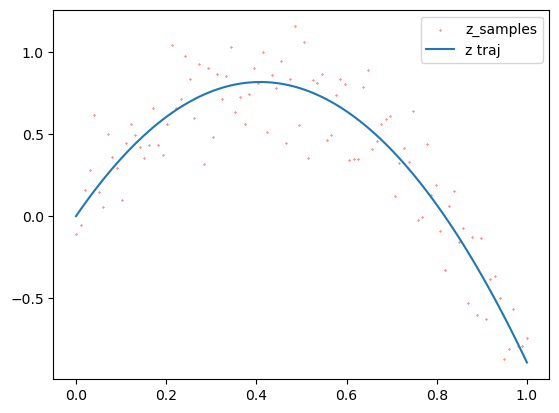

In [6]:
v_z = v_pred[2]
plt.scatter(t, z_samples, c='r', s=0.1, label="z_samples")
plt.plot(t, fit_z(t, v_z), label='z traj')
plt.legend()
plt.show()

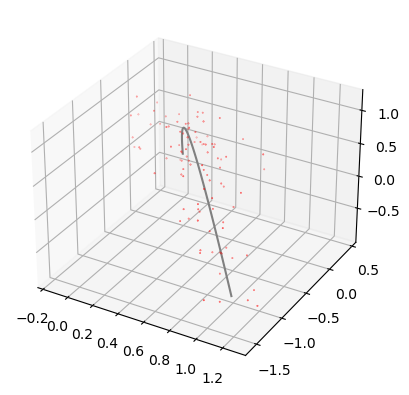

In [11]:
#x_int, y_int = xy_intercept(v_pred)
#print(x_int, y_int)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x, y, z = fit_xy(t, *v_pred[0]), fit_xy(t, *v_pred[1]), fit_z(t, *v_pred[2])
ax.plot3D(x, y, z, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(x_samples, y_samples, z_samples, c='r', cmap='Greens', s=0.1)
#ax.scatter3D(x_int, y_int, 0)